손실함수(cost function)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data=np.array([
    [0,1,1,2,3,np.nan],
    [np.nan,1,1,2,1,-1]
])
data

array([[ 0.,  1.,  1.,  2.,  3., nan],
       [nan,  1.,  1.,  2.,  1., -1.]])

In [65]:
np.nansum(data)


11.0

In [66]:
#두개를 비교해서 오차 적은것을 구한다
def cost(pred,R):
  #행렬 인수분해 알고리즘 손실 계산해 주는 함수 생성
  rating=(pred-R)**2

  return np.nansum(rating)

In [67]:
#예측 값 행렬
pred=\
np.array([
    [4,4,1,1,2,2],
    [4,4,3,1,5,5],
    [2,2,1,1,3,4],
    [1,3,1,4,2,2],
    [1,2,4,1,2,5]    
])

In [70]:
#실제 값 행렬
R = \
np.array([
    [3,4,1,np.nan,1,2],
    [4,4,3,np.nan,5,3],
    [2,3,np.nan, 1,3,4],
    [1,3,2,4,2,2],
    [1,2,np.nan,1,2,5]
    ])

In [71]:
cost(pred,R)

8.0

경사하강법

In [54]:
#채점을 위해서 임의성(random) 사용하는 numpy 도구들의 결과를 일정하게 나오게 해야함

np.random.seed(32)

In [72]:
#numpy 출력 옵션 설정

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [73]:
#유저 취향과 상품 속성을 곱해서 예측 값을 계산하는 함수
def predict(Theta,X):
  return Theta @ X

In [74]:
#cost function(손실함수) : 예측값과 실제값의 차이 >> 최소화
def cost(prediction,R):
  return np.nansum((prediction-R)**2)

In [75]:
#임의로 유저 취향과 상품 속성 행렬 만들어 주는 함수
def initialize(R,num_features):
  num_users, num_items=R.shape

  Theta=np.random.rand(num_users,num_features)
  X=np.random.rand(num_features, num_items)

  return Theta,X

In [76]:
def gradient_descent(R,Theta,X,iteration,alpha,lambda_):
  #R : 실제 평점 데이터, Theta : 유저 취향 행렬, X : 영화 속성 행렬
  #iteration : 경사하강 횟수(반복), alpha : 학습률(learning rate), lambda_ : 정규화 상수

  #행렬 인수 분해(matrix factorizaion) 경사하강 함수
  num_user, num_items=R.shape #유저 데이터, 영화 데이터, 속성 개수 파악
  num_features=len(X) #영화 속성 행렬 크기 >> num_features 속성 개수
  costs=[] #경사 하강을 할 때마다 손실 계산

  for _ in range(iteration):    #default 된 자체로 그대로 for문, 경사하고 싶은 만큼 반복
    prediction=predict(Theta,X) #예측값 계싼
    error=prediction-R          #원소별 예측값과 실제값의 차이(오차) ㅈ저장하는 행렬 계산산
    costs.append(cost(prediction,R))

    #모든 유저, 모든 영화 데이터, 모든 속성에 대해 번복해서 도는 반복문 작성
    for i in range(num_user):
      for j in range(num_items):
        if not np.isnan(R[i][j]):#데이터 평점 없는 값들에 대해서 건너뛰기
          for k in range(num_features):

            Theta[i][k]-=alpha * (np.nansum(error[i,:]*X[k,:])+lambda_ * Theta[i][k])
            X[k][j] -= alpha * (np.nansum(error[:,j]*Theta[:,k])+lambda_ * X[k][j])

  return Theta, X, costs


In [77]:
#실행 코드
#1.평점 데이터 가져오기
path='/content/drive/MyDrive/Classroom/인공지능 서비스 개발자 _ 강동1기/data/cf_ratings.csv'
pd.read_csv(path, index_col='user_id')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
user_id,,,,,,,,,,,,,,,,,,,,
0,2.0,3.0,4.0,NaN,2.0,3.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,1.0,NaN,NaN,2.0,5.0,2.0,NaN
1,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,2.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
2,2.0,NaN,1.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,3.0,3.0,NaN,3.0,3.0,4.0,NaN,NaN
3,NaN,3.0,5.0,NaN,NaN,NaN,4.0,3.0,NaN,5.0,3.0,NaN,4.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,5.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,4.0,2.0,5.0,4.0,NaN,NaN,NaN,4.0,2.0
5,NaN,4.0,3.0,NaN,NaN,5.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,1.0,NaN,4.0,3.0,NaN,5.0
6,3.0,NaN,NaN,NaN,4.0,5.0,2.0,2.0,NaN,3.0,NaN,4.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,1.0
7,NaN,5.0,1.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,4.0
8,NaN,3.0,1.0,1.0,NaN,3.0,NaN,4.0,NaN,1.0,1.0,NaN,4.0,4.0,2.0,NaN,NaN,5.0,3.0,NaN


In [78]:
df=pd.read_csv(path, index_col='user_id')

#2. 평점 데이터에 mean normalization(평균 정규화) 적용
for row in df.values:
  row -= np.nanmean(row)

(array([[-0.88,  0.16,  1.22, -0.39,  0.45],
        [-0.51, -0.26, -1.06,  0.52,  1.35],
        [-1.56,  0.23,  0.17,  0.63,  0.78],
        [-0.46, -0.8 ,  0.19, -0.61, -0.47],
        [ 0.08, -0.5 , -0.44,  0.11,  1.47],
        [ 1.13,  0.52,  0.6 ,  0.99,  0.25],
        [ 0.8 , -0.72, -0.56,  1.51,  1.17],
        [ 0.79, -0.04,  0.12, -1.08,  1.54],
        [ 0.74,  0.89, -0.64, -1.04,  0.91],
        [-0.17,  0.67, -0.21,  0.72,  0.04],
        [-0.37,  0.08,  1.35, -0.23,  0.64],
        [ 0.6 , -0.16,  0.7 ,  0.87, -0.77],
        [ 0.19, -0.55,  1.37,  0.72, -0.11],
        [-1.28,  0.76,  0.06,  0.19,  1.08],
        [ 0.59,  1.21, -0.57, -0.47, -0.72],
        [ 0.32, -0.15,  0.17,  1.31, -0.1 ],
        [ 0.02, -0.72,  0.51, -1.06,  1.32],
        [ 1.41,  0.28,  0.67,  0.53,  1.52],
        [-0.3 ,  1.7 , -1.24, -0.52, -0.97],
        [ 1.  , -0.43,  0.66, -1.28, -0.34]]),
 array([[ 0.63,  1.1 ,  0.23,  0.56,  1.51, -0.06, -0.93,  1.03,  1.03,
         -0.98, -1.26, -0.

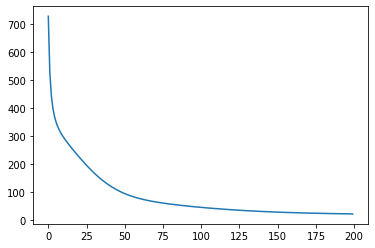

In [79]:
#실제값
R=df.values

#행렬들 초기화
Theta,X=initialize(R,5)

#경사하강
#alpha:0.001,lambda_:0.01 로 주로 많이 사용

Theta,X,costs=gradient_descent(R,Theta,X, 200, 0.001, 0.01)


#손실이 줄어드는 걸 시각화 하는 코드
#x축: iteration(반복횟수), y축:error
plt.plot(costs)
Theta, X
